# Import Libraries
Import necessary libraries including NumPy, Matplotlib, scikit-learn for data, pickle for model saving/loading, networkx for visualization, and tqdm for progress tracking.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Training and Evaluation on Dataset
Load the dataset, preprocess it for classification, and train the FFNN model with appropriate hyperparameters. Evaluate model performance using accuracy metrics.

In [2]:
from activation import Linear, ReLU, Sigmoid, Tanh, Softmax, LeakyReLU, ELU
from loss import MeanSquaredError, BinaryCrossEntropy, CategoricalCrossEntropy
from initialization import ZeroInitialization, UniformInitialization, NormalInitialization, XavierInitialization, HeInitialization
from model import FFNN

### Load Dataset & Data Preparation

In [3]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Label butuh di-encode dengan One Hot
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

Epoch 1/20


100%|██████████| 56000/56000 [00:02<00:00, 19597.62it/s, train_loss=0.8391, val_loss=0.4740]


Epoch 2/20


100%|██████████| 56000/56000 [00:02<00:00, 19438.71it/s, train_loss=0.3763, val_loss=0.3428]


Epoch 3/20


100%|██████████| 56000/56000 [00:02<00:00, 19699.28it/s, train_loss=0.2879, val_loss=0.3021]


Epoch 4/20


100%|██████████| 56000/56000 [00:02<00:00, 19687.53it/s, train_loss=0.2481, val_loss=0.2753]


Epoch 5/20


100%|██████████| 56000/56000 [00:02<00:00, 19336.06it/s, train_loss=0.2238, val_loss=0.2623]


Epoch 6/20


100%|██████████| 56000/56000 [00:03<00:00, 15122.51it/s, train_loss=0.2058, val_loss=0.2527]


Epoch 7/20


100%|██████████| 56000/56000 [00:01<00:00, 29527.27it/s, train_loss=0.1934, val_loss=0.2473]


Epoch 8/20


100%|██████████| 56000/56000 [00:01<00:00, 30457.71it/s, train_loss=0.1832, val_loss=0.2397]


Epoch 9/20


100%|██████████| 56000/56000 [00:01<00:00, 29198.75it/s, train_loss=0.1742, val_loss=0.2379]


Epoch 10/20


100%|██████████| 56000/56000 [00:01<00:00, 29768.47it/s, train_loss=0.1675, val_loss=0.2392]


Epoch 11/20


100%|██████████| 56000/56000 [00:01<00:00, 28665.91it/s, train_loss=0.1618, val_loss=0.2331]


Epoch 12/20


100%|██████████| 56000/56000 [00:01<00:00, 28363.20it/s, train_loss=0.1561, val_loss=0.2328]


Epoch 13/20


100%|██████████| 56000/56000 [00:01<00:00, 29702.78it/s, train_loss=0.1515, val_loss=0.2315]


Epoch 14/20


100%|██████████| 56000/56000 [00:01<00:00, 30122.72it/s, train_loss=0.1475, val_loss=0.2300]


Epoch 15/20


100%|██████████| 56000/56000 [00:01<00:00, 30437.02it/s, train_loss=0.1430, val_loss=0.2277]


Epoch 16/20


100%|██████████| 56000/56000 [00:01<00:00, 33672.66it/s, train_loss=0.1391, val_loss=0.2288]


Epoch 17/20


100%|██████████| 56000/56000 [00:01<00:00, 30729.09it/s, train_loss=0.1364, val_loss=0.2286]


Epoch 18/20


100%|██████████| 56000/56000 [00:01<00:00, 32243.71it/s, train_loss=0.1348, val_loss=0.2288]


Epoch 19/20


100%|██████████| 56000/56000 [00:01<00:00, 31731.22it/s, train_loss=0.1308, val_loss=0.2265]


Epoch 20/20


100%|██████████| 56000/56000 [00:01<00:00, 33638.59it/s, train_loss=0.1278, val_loss=0.2296]


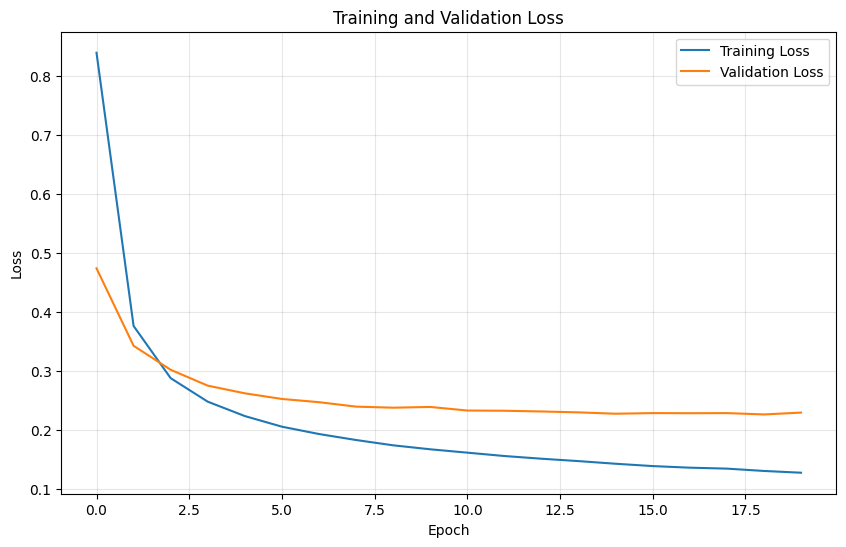

Test accuracy: 0.9399


In [4]:
layer_sizes = [784, 16, 8, 10]  # Fitur input ada 784

activations = [
    LeakyReLU(),
    LeakyReLU(), 
    Softmax()     
]

loss_function = CategoricalCrossEntropy()

initializations = [
    HeInitialization(seed=42),  
    XavierInitialization(seed=42),  
    HeInitialization(seed=42)   
]

model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss=loss_function,
    initializations=initializations
)

history = model.train(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    learning_rate=0.01,
    epochs=20,
    x_y_val=(X_test, y_test),
    verbose=1
)

# plot loss
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# prediksi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred_classes == y_true_classes)
print(f"Test accuracy: {accuracy:.4f}")

# Model Visualization
Implement visualization of model architecture, training history, weight distributions, and gradient distributions using matplotlib and networkx.

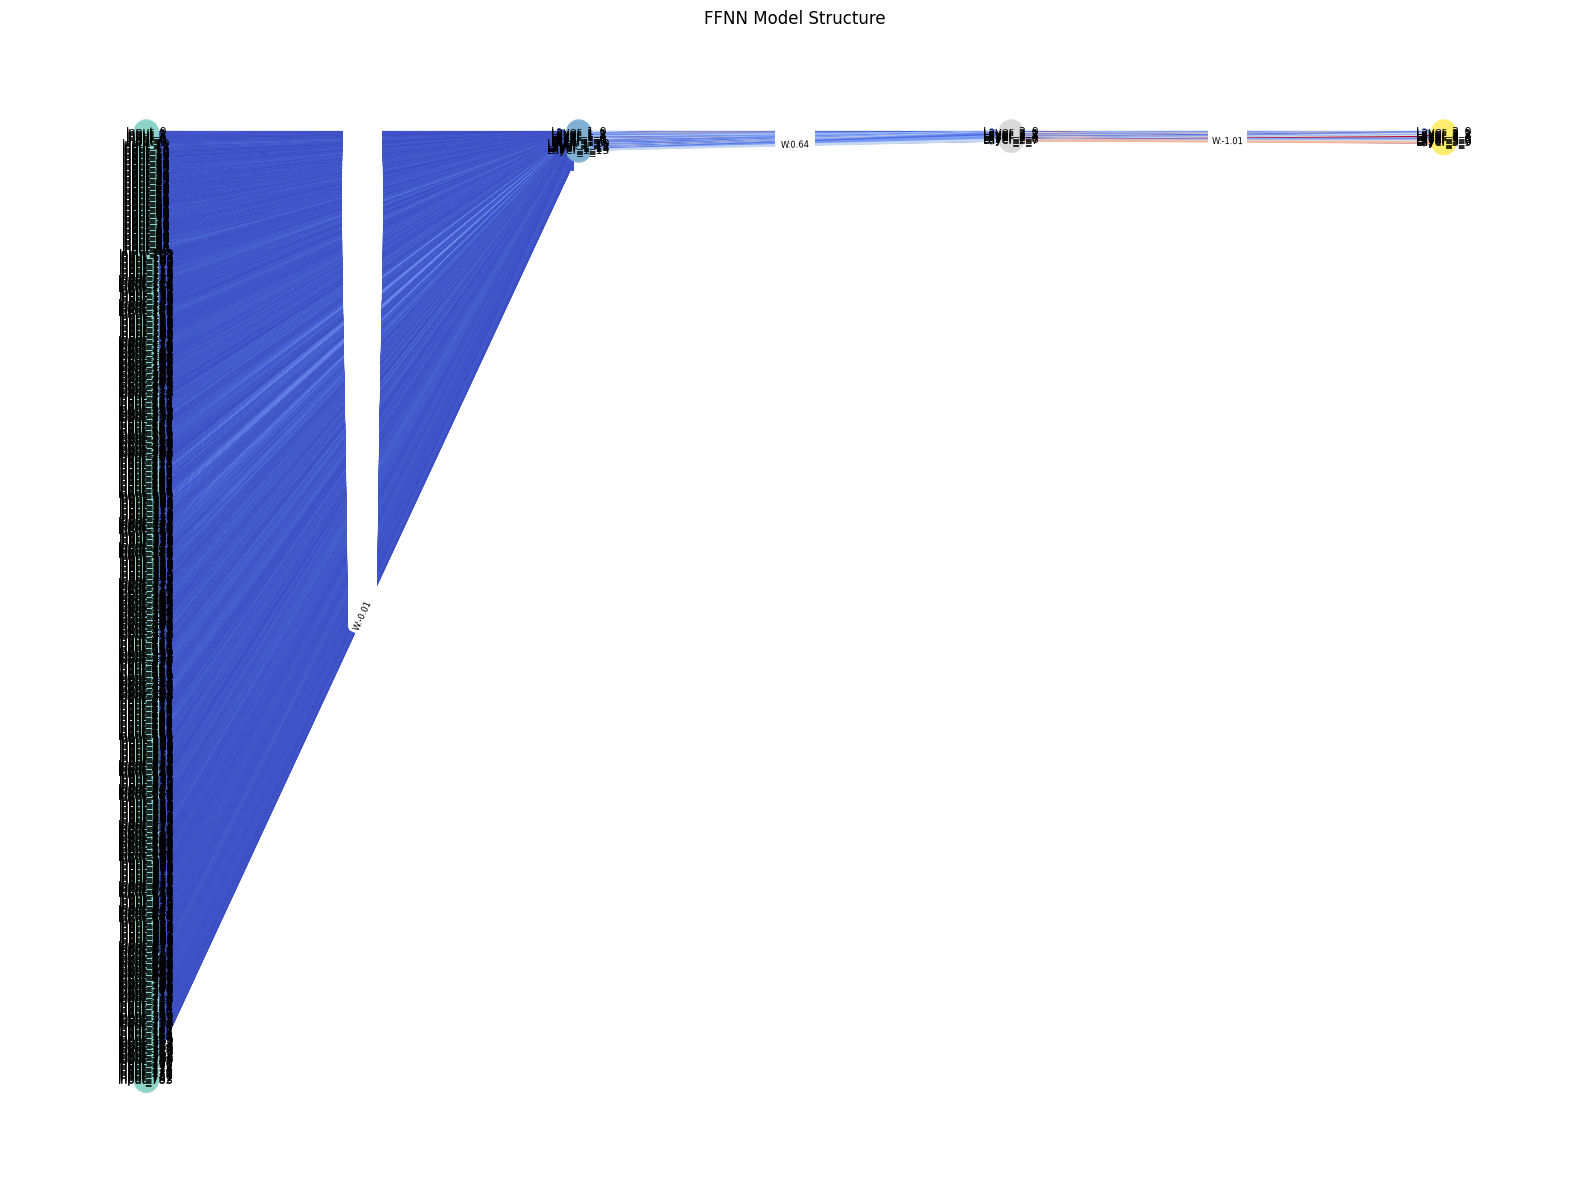

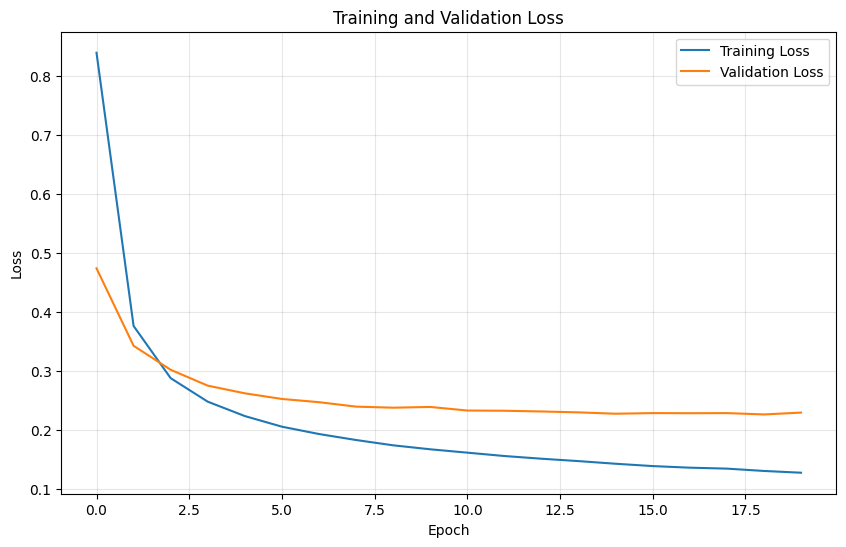

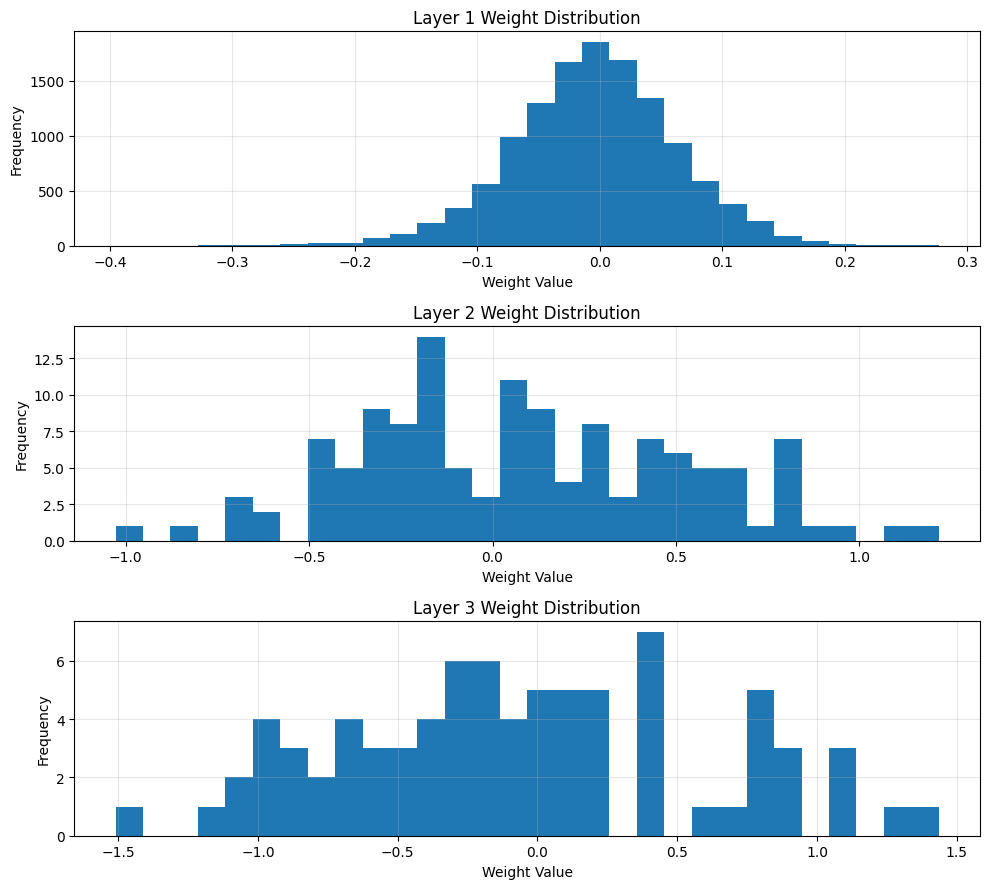

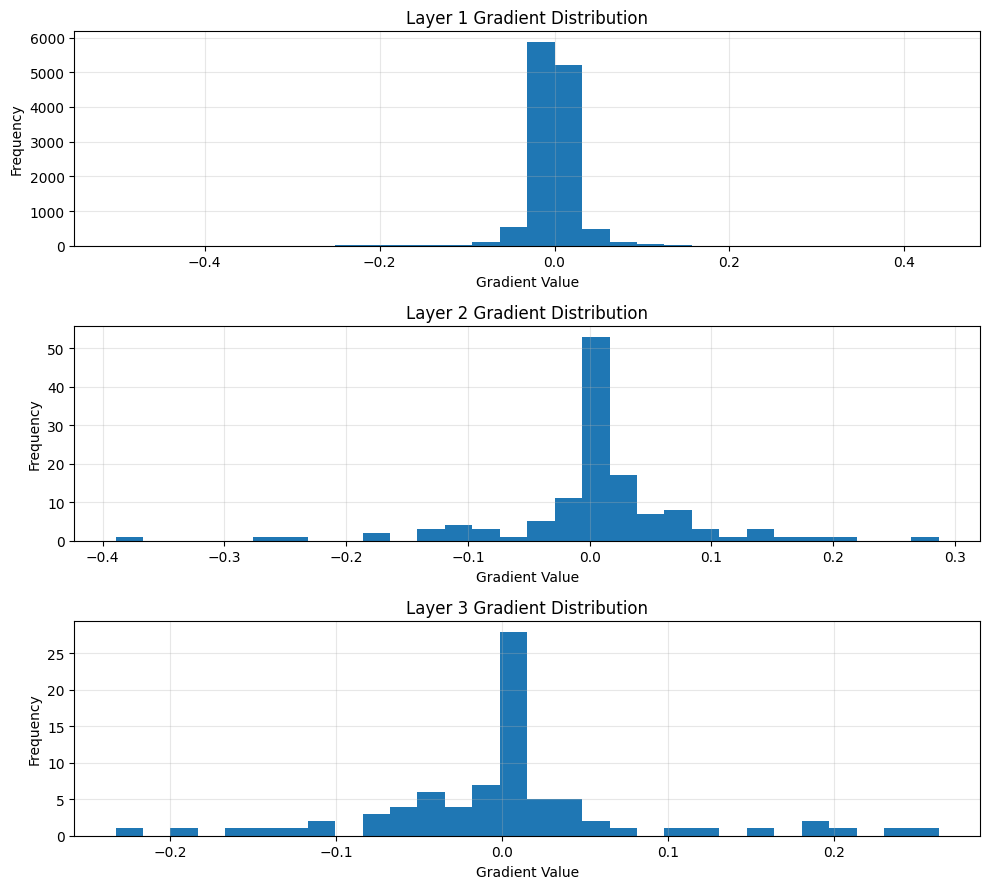

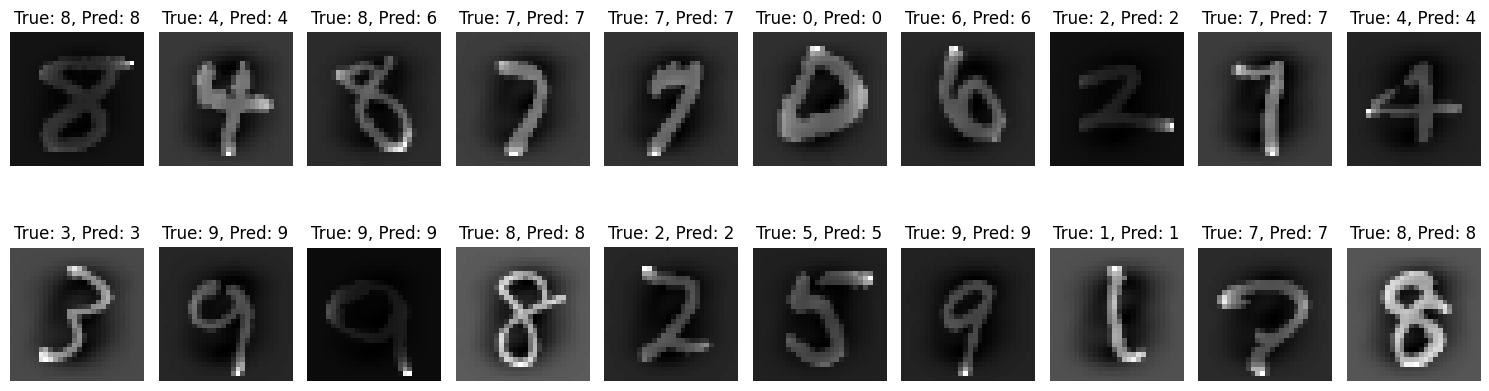

In [5]:
# Visualisasi arsitektur model FFNN
model.plot_model()

# Grafik History Training (Epoch terhadap Loss)
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Distribusi Bobot di tiap layer
model.plot_weight_distribution()

# Distribusi gradient di tiap layer
model.plot_gradient_distribution()

# contoh hasil prediksi 20 data:
plt.figure(figsize=(15, 5))
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true_classes[i]}, Pred: {y_pred_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Save and Load Model
Demonstrate saving the trained model to disk and loading it back, then verify the loaded model produces identical predictions.

In [6]:
# Simpen model ke file
model.save("ffnn_model.pkl")

# Load model dari file
loaded_model = FFNN.load("ffnn_model.pkl")

# Cek apakah model yang di-load hasilin prediksi yang sama
y_pred_original = model.predict(X_test)
y_pred_loaded = loaded_model.predict(X_test)
identical_predictions = np.allclose(y_pred_original, y_pred_loaded)
print(f"Are predictions identical? {'Yes' if identical_predictions else 'No'}")

# Hitung akurasi untuk model yang di-load
y_pred_loaded_classes = np.argmax(y_pred_loaded, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
accuracy_loaded = np.mean(y_pred_loaded_classes == y_true_classes)
print(f"Test accuracy (loaded model): {accuracy_loaded:.4f}")

Are predictions identical? Yes
Test accuracy (loaded model): 0.9399
